## Portrait-GANerator
* Set up code environment

  * GPU is required, with Anaconda Python 3.6. This pipeline has been tested on AWS (Amazon Web Services) with a Amazon EC2 P2 instance *p2.xlarge* (single NVIDIA K80 GPU) in AMI (Amazon Machine Images) *Deep Learning AMI (Ubuntu 16.04) Version 25.3*. 
  
  * Clone Github repository by running `!git clone https://github.com/FangfeiLi05/Insight_Project.git`.

  * `cd` to the root directory (the folder containing `README.md`).

  * Intstall dependencies by running `!pip install -r requirements.txt`.


* Train a multivariate multidependents logistic regression model to simultaneously get all normalized and orthogonal feature axes (`Gender, Makeup, Glasses, Age, Smile, Anger, Contempt, Disgust, Fear, Neutral, Sadness, Surprise, Beard, Bald, BlondHair, BlackHair`) in the latent space, by running `!python feature_axis.py`. The output file `feature_axis.h5` is saved in the folder `~/data/`.

* Train a ResNet or a EfficientNet to convert a image to a latent vector (18*512), that is used as the initial value in encoding the image to a latent vector, by running `!python train_resnet.py --test_size 256 --batch_size 1024 --max_patience 1`, or `!python train_effnet.py --test_size 256 --batch_size 1024 --loop 1 --max_patience 1`. The output file `finetuned_resnet.h5` or `finetuned_effnet.h5` is saved in the folder `~/data/`.

*  Encode the image into the latent vector, by running `!python image_encoder.py --load_resnet=data/finetuned_resnet --use_vgg_loss=1 images_raw/ images_aligned/ images_generate/ images_latent/`, or `!python image_encoder.py --load_effnet=data/finetuned_effnet --use_vgg_loss=1 images_raw/ images_aligned/ images_generate/ images_latent/`. The input original images are stored in the folder `~/images_raw/`. The output aligned images are stored in the folder `~/images_aligned/`. The output reconstructed images are stored in the folder `~/images_generate/`. The output latent vectors of images are stored in the folder `~/images_latent/`.

* Tune facial features by moving the latent vector in the latent space, then reconstruct the image using the pretrained StyleGAN generator.


In [113]:
!python feature_axis.py

Using TensorFlow backend.
W1013 07:02:02.047574 140573991900928 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1013 07:02:02.078270 140573991900928 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1013 07:02:02.078472 140573991900928 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1013 07:02:02.079329 140573991900928 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_

In [5]:
!python train_resnet.py --test_size 256 --batch_size 1024 --max_patience 1

W1012 22:14:07.012544 139800802395904 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:34: The name tf.Dimension is deprecated. Please use tf.compat.v1.Dimension instead.

W1012 22:14:07.013198 139800802395904 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:74: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1012 22:14:07.013323 139800802395904 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:128: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

Using TensorFlow backend.
W1012 22:14:07.048757 139800802395904 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:97: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1012 22:14:07.050270 139800802395904 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tf

In [6]:
!python train_effnet.py --test_size 256 --batch_size 1024 --loop 1 --max_patience 1

W1012 22:31:32.224229 140341998835456 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:34: The name tf.Dimension is deprecated. Please use tf.compat.v1.Dimension instead.

W1012 22:31:32.225161 140341998835456 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:74: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1012 22:31:32.225316 140341998835456 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:128: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

Using TensorFlow backend.
W1012 22:31:32.930247 140341998835456 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:97: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1012 22:31:32.930514 140341998835456 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tf

In [ ]:
!python image_encoder.py --load_resnet=data/finetuned_resnet --use_vgg_loss=1 images_raw/ images_aligned/ images_generate/ images_latent/


In [4]:
!python image_encoder.py --load_effnet=data/finetuned_effnet --use_vgg_loss=1 images_raw/ images_aligned/ images_generate/ images_latent/



W1013 01:54:53.113094 140258434295552 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:34: The name tf.Dimension is deprecated. Please use tf.compat.v1.Dimension instead.

W1013 01:54:53.113821 140258434295552 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:74: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1013 01:54:53.114012 140258434295552 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:128: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

Using TensorFlow backend.
W1013 01:54:53.218024 140258434295552 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tfutil.py:97: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1013 01:54:53.218306 140258434295552 deprecation_wrapper.py:119] From /home/ubuntu/Insight_Project/dnnlib/tflib/tf

Original photo...


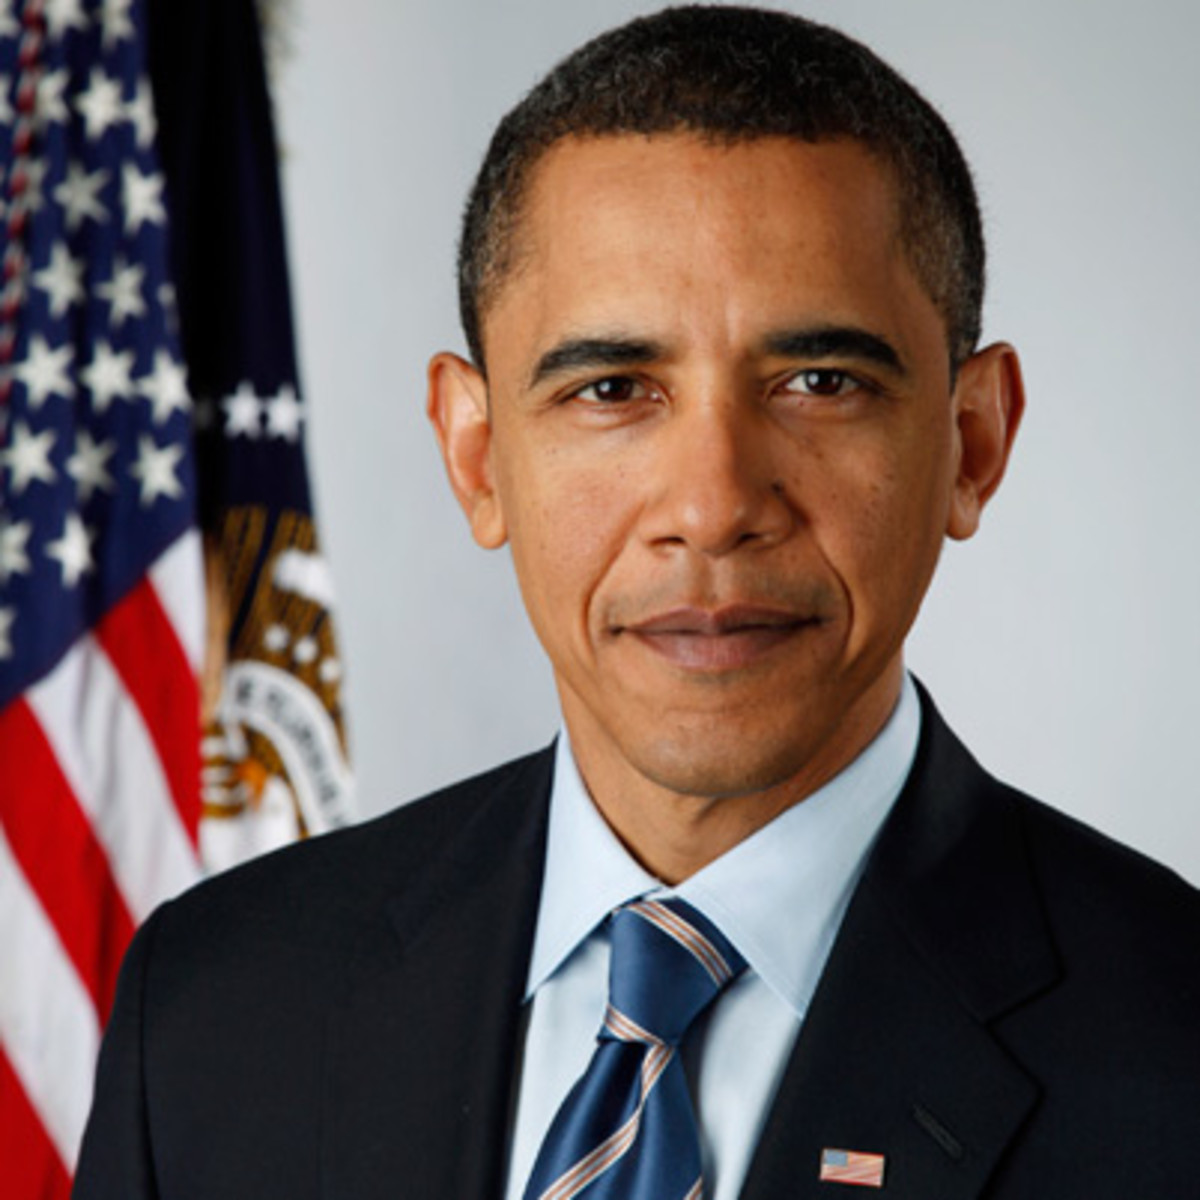



Aligned photo...


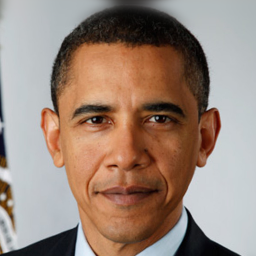



Reconstructed photo...


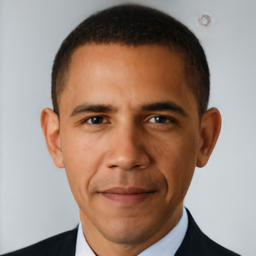

In [98]:
from PIL import Image
import numpy as np
from manipulate_latent import latent_to_image


print('Original photo...')
display(Image.open('./images_raw/000001.jpg'))
print('\n')


print('Aligned photo...')
display(Image.open('./images_aligned/000001_01.png').resize((256,256)))
print('\n')


#from manipulate_latent import latent_to_imageRGB
#image_array = latent_to_imageRGB(image_latent)
#Image.fromarray(image_array, 'RGB').resize((256,256), PIL.Image.LANCZOS)

print('Reconstructed photo...')
image_latent = np.load('./images_latent/000001_01.npy')
latent_to_image(image_latent)


Feature-tuned photo...


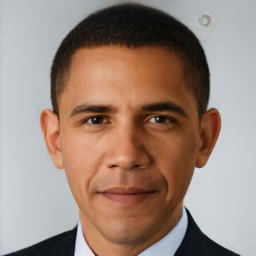

In [122]:
import pandas as pd
from manipulate_latent import tune_latent

feature_axis_DataFrame = pd.read_hdf('./data/feature_axis.h5', 'df')
feature_axis_array = np.array(feature_axis_DataFrame)

i = 13
direction = feature_axis_array[:,i].reshape((18, 512))
coeff = -2


print('Feature-tuned photo...')
image_latent_tuned = tune_latent(image_latent, direction, coeff, list(range(8)))
latent_to_image(image_latent_tuned)


In [2]:
#Build a GUI interface
import os
import glob
import sys
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import PIL
import ipywidgets
import io
from manipulate_latent import latent_to_image
from manipulate_latent import latent_to_imageRGB

feature_axis_DataFrame = pd.read_hdf('./data/feature_axis.h5', 'df')
feature_axis_array = np.array(feature_axis_DataFrame)
feature_label_list = list(feature_axis_DataFrame.columns)
feature_label_list = [i[0].capitalize()+i[1:] for i in feature_label_list]
num_feature = len(feature_label_list)


def img_to_bytes(image_RGB):
    imgObj = PIL.Image.fromarray(image_RGB)
    imgByteArr = io.BytesIO()
    imgObj.save(imgByteArr, format='PNG')
    imgBytes = imgByteArr.getvalue()
    return imgBytes


image_latent = np.load('./images_latent/000001_01.npy')
image_RGB = latent_to_imageRGB(image_latent)
w_img = ipywidgets.widgets.Image(value=img_to_bytes(image_RGB), fromat='png', width=512, height=512)


class GuiCallback(object):
    counter = 0
    #dlatent = z_sample
    def __init__(self):
        self.dlatent_original = image_latent.copy()
        self.dlatent = image_latent.copy()
        self.feature_axis = feature_axis_array
    
    def image_generate(self):        
        image_RGB = latent_to_imageRGB(self.dlatent)
        x_byte = img_to_bytes(image_RGB)
        w_img.value = x_byte
        
    def feature_tune(self, event, idx_feature, step_size=0.1, layers=list(range(0,8))):
        tempt = np.reshape(self.feature_axis[:, idx_feature], (18,512))
        self.dlatent[layers,:] += tempt[layers,:] * step_size
        self.image_generate()
    
    def image_reset(self, event):
        self.dlatent = self.dlatent_original.copy()
        self.image_generate()

guicallback = GuiCallback()


step_size = 1
def create_button(idx_feature, width=100, height=75):
    """ function to built button groups for one feature """
    w_feature = ipywidgets.widgets.ToggleButton(value=False, description=feature_label_list[idx_feature], 
                                          tooltip='{}, Click to mark that this feature has be tuned'.format(feature_label_list[idx_feature]), 
                                          layout=ipywidgets.Layout(height='{:.0f}px'.format((height-6*3)/2), 
                                                                   width='{:.0f}px'.format(width-6*2), 
                                                                   margin='6px 6px 3px 6px', align_items='stretch'))
    w_neg = ipywidgets.widgets.Button(description='-', layout=ipywidgets.Layout(height='{:.0f}px'.format((height-6*3)/2), 
                                                               width='{:.0f}px'.format((width-6*3)/2), 
                                                               margin='3px 3px 6px 6px', align_items='stretch')) 
    w_pos = ipywidgets.widgets.Button(description='+', layout=ipywidgets.Layout(height='{:.0f}px'.format((height-6*3)/2), 
                                                               width='{:.0f}px'.format((width-6*3)/2), 
                                                               margin='3px 6px 6px 3px', align_items='stretch'))
    
    #w_feature.on_click(lambda event: guicallback.feature_reset(event, idx_feature))
    w_neg.on_click(lambda event: guicallback.feature_tune(event, idx_feature, step_size =- step_size))
    w_pos.on_click(lambda event: guicallback.feature_tune(event, idx_feature, step_size =+ step_size))
    
    button_group = ipywidgets.VBox([w_feature, ipywidgets.HBox([w_neg, w_pos])],
                                  layout=ipywidgets.Layout(border='1px solid gray', margin = '1px'))
    
    return button_group


list_buttons = []
for idx_feature in range(num_feature):
    list_buttons.append(create_button(idx_feature))

    
def arrange_buttons(list_buttons, ncol=4):
    num = len(list_buttons)
    layout_all_buttons = ipywidgets.VBox([ipywidgets.HBox(list_buttons[i*ncol:(i+1)*ncol]) for i in range(num//ncol+int(num%ncol>0))])
    return layout_all_buttons
    

w_button_reset = ipywidgets.widgets.Button(tooltip='Reset to untuned photo',  
                                           description='Image Reset', button_style='success',
                                           layout=ipywidgets.Layout(height='60px', 
                                                                    width='194px', 
                                                                    margin='6px 6px 6px 6px', 
                                                                    align_items='stretch'))
w_button_reset.on_click(guicallback.image_reset)

w_box = ipywidgets.HBox([w_img, ipywidgets.VBox([w_button_reset, arrange_buttons(list_buttons)])], 
                        layout=ipywidgets.Layout(height='1048}px', width='1096px'))



print('Click +/- to tune feature')
display(w_box)

Click +/- to tune feature
